In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
import pdb
import seaborn as sns
%matplotlib inline

# Load figure style
plt.style.use('fig_style_small.txt')

In [2]:
naive_ct_df = pd.read_csv('csv_results/pct_profiles_naive.csv', index_col=[0,1])
naive_ct_df

p4     p5      p6      p7      p8      p9   p10
end    sample                                                   
PPP_v1 rep1    1031   9666   85178  876828  758126  137911  8446
       rep2    1344  10121   86681  809092  687747  126382  7746
       rep3    1137   8986   75019  714802  616809  109581  6744
PPP_v2 rep1     567   4623   45703  741236  674993  127725  5274
       rep2     640   5305   50472  713574  638093  120415  5266
       rep3     670   4556   43644  659732  599917  115790  6477
OH_v1  rep1     906  11606  139486  178765   50194    4472  2835
       rep2    1068  11792  143885  158125   35019    2282  2636
       rep3     870  10544  126733   91978  -15897  -11367   605
OH_v2  rep1     442   6563  100011   43173  -32939   -5714  -337
       rep2     364   6976  107676   62607  -14635   -3685   156
       rep3     403   6114   95358   36908  -32789   -5158   338

In [3]:
efficiency_df = pd.read_csv(f'csv_results/efficiencies.csv').set_index(['sample','replicate'])
efficiency_df = efficiency_df.reset_index()
efficiency_df

,sample,replicate,efficiency
0,none,rep1,1.000000
1,none,rep2,1.000000
2,none,rep3,1.000000
3,Rpp,rep1,0.910393
4,Rpp,rep2,0.922886
5,Rpp,rep3,0.987480
6,PNK,rep1,0.755147
7,PNK,rep2,0.751011
8,PNK,rep3,0.753237
9,both,rep1,0.911045


In [4]:
corrected_ct_df = pd.read_csv('csv_results/pct_profiles_corrected.csv', index_col=[0,1])
corrected_ct_df

p4        p5         p6         p7         p8        p9  \
end    sample                                                                  
PPP_v1 rep1    0.034883  0.348807   2.968897  47.037566  41.528803  7.697509   
       rep2    0.059261  0.415861   3.366816  47.161961  40.905770  7.702446   
       rep3    0.051502  0.380186   2.873737  47.082749  41.681533  7.576354   
PPP_v2 rep1    0.042993  0.339371   3.106801  46.245817  42.021600  7.875011   
       rep2    0.049060  0.391175   3.509730  46.449537  41.474609  7.752681   
       rep3    0.047899  0.326079   3.088842  46.098149  41.906727  8.075124   
OH_v1  rep1    0.233985  2.999743  36.067380  46.043548  12.800270  1.124424   
       rep2    0.270580  2.919358  35.006648  44.768930  14.674889  1.637445   
       rep3    0.293688  3.339492  38.645126  45.324790  12.255599 -0.318712   
OH_v2  rep1    0.269189  2.958714  36.665210  42.606559  14.940233  1.895128   
       rep2    0.233062  2.828543  35.531727  42.149134  16.767094  1.822263   
       rep3    0.279706  3.129564  39.477499  41.507235  13.130123  1.615562   
PPP    rep1    0.038938  0.344089   3.037849  46.641690  41.775202  7.786260   
       rep2    0.054160  0.403518   3.438273  46.805748  41.190190  7.727563   
       rep3    0.049701  0.353132   2.981290  46.590446  41.794130  7.825740   
OH     rep1    0.251587  2.979228  36.366299  44.325032  13.870265  1.509781   
       rep2    0.251821  2.873950  35.269190  43.459023  15.720999  1.729855   
       rep3    0.286697  3.234526  39.061322  43.415968  12.692872  0.648448   

                    p10  
end    sample            
PPP_v1 rep1    0.383536  
       rep2    0.387885  
       rep3    0.353939  
PPP_v2 rep1    0.368407  
       rep2    0.373209  
       rep3    0.457180  
OH_v1  rep1    0.730650  
       rep2    0.722149  
       rep3    0.460015  
OH_v2  rep1    0.664967  
       rep2    0.668176  
       rep3    0.860309  
PPP    rep1    0.375971  
       rep2    0.380547  
       rep3    0.405560  
OH     rep1    0.697808  
       rep2    0.695162  
       rep3    0.660167

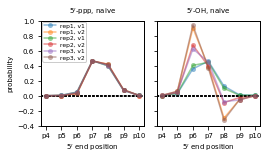

In [5]:
# Plot naive count profiles
fig, axs = plt.subplots(1,2,figsize=[3.75,2.25], sharey=True)
xs = list(range(4,11))

reps = ['rep1','rep2','rep3']
poss = [f'p{x}' for x in xs]
ylim = [-.4, 1.0]

ax = axs[0]
for rep in reps:
    ax.axhline(0, linestyle=':', color='k')
    for end in ['PPP_v1', 'PPP_v2']:
        cts = naive_ct_df.loc[(end, rep),:]
        probs = cts/np.sum(cts)
        ax.plot(xs, probs, '-o', markersize=5, markeredgewidth=0, label=f'{rep}, {end[-2:]}', alpha=.5)
    ax.set_ylabel('probability')
    ax.set_ylim(ylim)
    ax.set_xticks(xs)
    ax.set_xticklabels(poss)
    ax.set_title('$5^\prime$-ppp, naive')
    ax.set_xlabel('$5^\prime$ end position')
    ax.legend(loc='upper left', ncol=1)
    
ax = axs[1]
for rep in reps:
    ax.axhline(0, linestyle=':', color='k')
    for end in ['OH_v1', 'OH_v2']:
        cts = naive_ct_df.loc[(end, rep),:]
        probs = cts/np.sum(cts)
        ax.plot(xs, probs, '-o', 
                markersize=5, markeredgewidth=0, label=f'{rep}, {end[-2:]}', alpha=.5)
    ax.set_xticks(xs)
    ax.set_xticklabels(poss)
    ax.set_title('$5^\prime$-OH, naive')
    ax.set_xlabel('$5^\prime$ end position')
    
fig.tight_layout()
fig.savefig(f'figures/fig_S8A_naive_profiles.pdf')

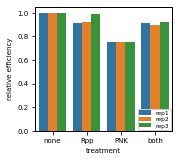

In [6]:
# Plot efficiencies
fig, ax = plt.subplots(1,1,figsize=[2.5,2.25])
sns.barplot(data=efficiency_df, y='efficiency', x='sample', hue='replicate', ax=ax)
ax.set_ylabel('relative efficiency')
ax.set_xlabel('treatment')
ax.legend(loc='lower right')
fig.tight_layout()
fig.savefig(f'figures/fig_S8B_efficiencies.pdf')

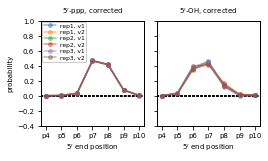

In [7]:
# Plot naive count profiles
fig, axs = plt.subplots(1,2,figsize=[3.75,2.25], sharey=True)
xs = list(range(4,11))

reps = ['rep1','rep2','rep3']
poss = [f'p{x}' for x in xs]
ylim = [-.4, 1.0]

ax = axs[0]
for rep in reps:
    ax.axhline(0, linestyle=':', color='k')
    for end in ['PPP_v1', 'PPP_v2']:
        cts = corrected_ct_df.loc[(end, rep),:]
        probs = cts/np.sum(cts)
        ax.plot(xs, probs, '-o', markersize=5, markeredgewidth=0, label=f'{rep}, {end[-2:]}', alpha=.5)
    ax.set_ylabel('probability')
    ax.set_ylim(ylim)
    ax.set_xticks(xs)
    ax.set_xticklabels(poss)
    ax.set_title('$5^\prime$-ppp, corrected')
    ax.legend(loc='upper left', ncol=1)
    ax.set_xlabel('$5^\prime$ end position')
    
ax = axs[1]
for rep in reps:
    ax.axhline(0, linestyle=':', color='k')
    for end in ['OH_v1', 'OH_v2']:
        cts = corrected_ct_df.loc[(end, rep),:]
        probs = cts/np.sum(cts)
        ax.plot(xs, probs, '-o', 
                markersize=5, markeredgewidth=0, label=f'{rep}, {end[-2:]}', alpha=.5)
    ax.set_xticks(xs)
    ax.set_xticklabels(poss)
    ax.set_title('$5^\prime$-OH, corrected')
    ax.set_xlabel('$5^\prime$ end position')
    
fig.tight_layout()
fig.savefig(f'figures/fig_S8C_corrected_profiles.pdf')